<!--NAVIGATION-->
< [简单的折线图](04.01-Simple-Line-Plots.ipynb) | [目录](Index.ipynb) | [误差可视化](04.03-Errorbars.ipynb) >

<a href="https://colab.research.google.com/github/wangyingsm/Python-Data-Science-Handbook/blob/master/notebooks/04.02-Simple-Scatter-Plots.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>


# Simple Scatter Plots

# 简单散点图

> Another commonly used plot type is the simple scatter plot, a close cousin of the line plot.
Instead of points being joined by line segments, here the points are represented individually with a dot, circle, or other shape.
We’ll start by setting up the notebook for plotting and importing the functions we will use:

另一种常用的图表类型是简单散点图，它是折线图的近亲。不像折线图，图中的点连接起来组成连线，散点图中的点都是独立分布的点状、圆圈或其他形状。本节开始我们也是首先将需要用到的图表工具和函数导入到notebook中：

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

## Scatter Plots with ``plt.plot``

## 使用 `plt.plot` 绘制散点图

> In the previous section we looked at ``plt.plot``/``ax.plot`` to produce line plots.
It turns out that this same function can produce scatter plots as well:

在上一节中，我们介绍了`plt.plot`/`ax.plot`方法绘制折线图。这两个方法也可以同样用来绘制散点图：

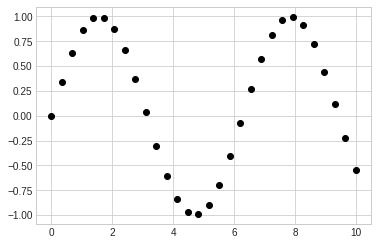

In [3]:
x = np.linspace(0, 10, 30)
y = np.sin(x)

plt.plot(x, y, 'o', color='black');

> The third argument in the function call is a character that represents the type of symbol used for the plotting. Just as you can specify options such as ``'-'``, ``'--'`` to control the line style, the marker style has its own set of short string codes. The full list of available symbols can be seen in the documentation of ``plt.plot``, or in Matplotlib's online documentation. Most of the possibilities are fairly intuitive, and we'll show a number of the more common ones here:

传递给函数的第三个参数是使用一个字符代表的图表绘制点的类型。就像你可以使用`'-'`或`'--'`来控制线条的风格那样，点的类型风格也可以使用短字符串代码来表示。所有可用的符号可以通过`plt.plot`文档或Matplotlib在线文档进行查阅。大多数的代码都是非常直观的，我们使用下面的例子可以展示那些最通用的符号：

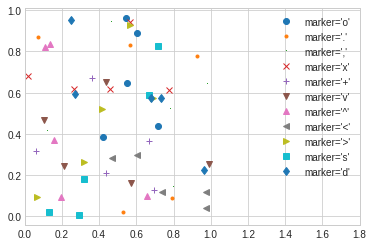

In [4]:
rng = np.random.RandomState(0)
for marker in ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']:
    plt.plot(rng.rand(5), rng.rand(5), marker,
             label="marker='{0}'".format(marker))
plt.legend(numpoints=1)
plt.xlim(0, 1.8);

> For even more possibilities, these character codes can be used together with line and color codes to plot points along with a line connecting them:

而且这些符号代码可以和线条、颜色代码一起使用，这会在折线图的基础上绘制出散点：

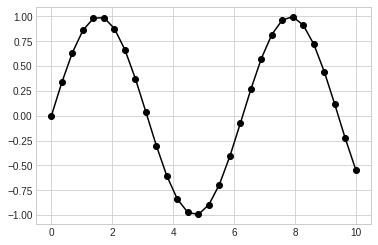

In [5]:
plt.plot(x, y, '-ok');

> Additional keyword arguments to ``plt.plot`` specify a wide range of properties of the lines and markers:

`plt.plot`还有很多额外的关键字参数用来指定广泛的线条和点的属性：

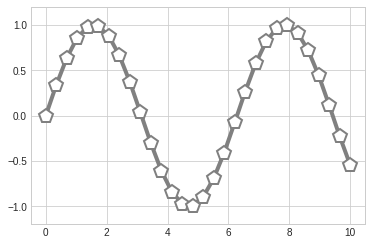

In [6]:
plt.plot(x, y, '-p', color='gray',
         markersize=15, linewidth=4,
         markerfacecolor='white',
         markeredgecolor='gray',
         markeredgewidth=2)
plt.ylim(-1.2, 1.2);

> This type of flexibility in the ``plt.plot`` function allows for a wide variety of possible visualization options.
For a full description of the options available, refer to the ``plt.plot`` documentation.

`plt.plot`函数的这种灵活性提供了很多的可视化选择。查阅`plt.plot`帮助文档获得完整的选项说明。

## Scatter Plots with ``plt.scatter``

## 使用`plt.scatter`绘制散点图

> A second, more powerful method of creating scatter plots is the ``plt.scatter`` function, which can be used very similarly to the ``plt.plot`` function:

第二种更强大的绘制散点图的方法是使用`plt.scatter`函数，它的使用方法和`plt.plot`类似：

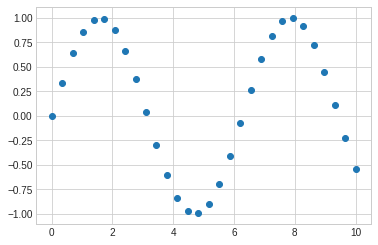

In [7]:
plt.scatter(x, y, marker='o');

> The primary difference of ``plt.scatter`` from ``plt.plot`` is that it can be used to create scatter plots where the properties of each individual point (size, face color, edge color, etc.) can be individually controlled or mapped to data.

`plt.scatter`和`plt.plot`的主要区别在于，`plt.scatter`可以针对每个点设置不同属性（大小、填充颜色、边缘颜色等），还可以通过数据集合对这些属性进行设置。

> Let's show this by creating a random scatter plot with points of many colors and sizes.
In order to better see the overlapping results, we'll also use the ``alpha`` keyword to adjust the transparency level:

让我们通过一个随机值数据集绘制不同颜色和大小的散点图来说明。为了更好的查看重叠的结果，我们还使用了`alpha`关键字参数对点的透明度进行了调整：

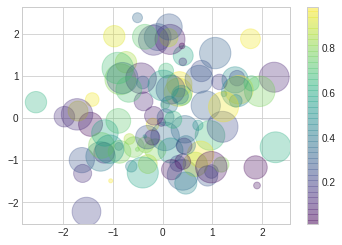

In [8]:
rng = np.random.RandomState(0)
x = rng.randn(100)
y = rng.randn(100)
colors = rng.rand(100)
sizes = 1000 * rng.rand(100)

plt.scatter(x, y, c=colors, s=sizes, alpha=0.3,
            cmap='viridis')
plt.colorbar();  # 显示颜色对比条

> Notice that the color argument is automatically mapped to a color scale (shown here by the ``colorbar()`` command), and that the size argument is given in pixels.
In this way, the color and size of points can be used to convey information in the visualization, in order to visualize multidimensional data.

注意图表右边有一个颜色对比条（这里通过`colormap()`函数输出），图表中的点大小的单位是像素。使用这种方法，散点的颜色和大小都能用来展示数据信息，在希望展示多个维度数据集合的情况下很直观。

> For example, we might use the Iris data from Scikit-Learn, where each sample is one of three types of flowers that has had the size of its petals and sepals carefully measured:

例如，当我们使用Scikit-learn中的鸢尾花数据集，里面的每个样本都是三种鸢尾花中的其中一种，并带有仔细测量的花瓣和花萼的尺寸数据：

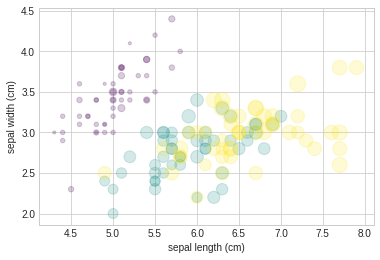

In [9]:
from sklearn.datasets import load_iris
iris = load_iris()
features = iris.data.T

plt.scatter(features[0], features[1], alpha=0.2,
            s=100*features[3], c=iris.target, cmap='viridis')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1]);

> We can see that this scatter plot has given us the ability to simultaneously explore four different dimensions of the data:
the (x, y) location of each point corresponds to the sepal length and width, the size of the point is related to the petal width, and the color is related to the particular species of flower.
Multicolor and multifeature scatter plots like this can be useful for both exploration and presentation of data.

我们可以从上图中看出，可以通过散点图同时展示该数据集的四个不同维度：图中的(x, y)位置代表每个样本的花萼的长度和宽度，散点的大小代表每个样本的花瓣的宽度，而散点的颜色代表一种特定的鸢尾花类型。如上图的多种颜色和多种属性的散点图对于我们分析和展示数据集时都非常有帮助。

## ``plot`` Versus ``scatter``: A Note on Efficiency

## `plot` 和 `scatter` 对比：性能提醒

> Aside from the different features available in ``plt.plot`` and ``plt.scatter``, why might you choose to use one over the other? While it doesn't matter as much for small amounts of data, as datasets get larger than a few thousand points, ``plt.plot`` can be noticeably more efficient than ``plt.scatter``.
The reason is that ``plt.scatter`` has the capability to render a different size and/or color for each point, so the renderer must do the extra work of constructing each point individually.
In ``plt.plot``, on the other hand, the points are always essentially clones of each other, so the work of determining the appearance of the points is done only once for the entire set of data.
For large datasets, the difference between these two can lead to vastly different performance, and for this reason, ``plt.plot`` should be preferred over ``plt.scatter`` for large datasets.

除了上面说的`plt.plot`和`plt.scatter`对于每个散点不同属性的支持不同之外，还有别的因素影响对这两个函数的选择吗？对于小的数据集来说，两者并无差别，当数据集增长到几千个点时，`plt.plot`会明显比`plt.scatter`的性能要高。造成这个差异的原因是`plt.scatter`支持每个点使用不同的大小和颜色，因此渲染每个点时需要完成更多额外的工作。而`plt.plot`来说，每个点都是简单的复制另一个点产生，因此对于整个数据集来说，确定每个点的展示属性的工作仅需要进行一次即可。对于很大的数据集来说，这个差异会导致两者性能的巨大区别，因此，对于大数据集应该优先使用`plt.plot`函数。

<!--NAVIGATION-->
< [简单的折线图](04.01-Simple-Line-Plots.ipynb) | [目录](Index.ipynb) | [误差可视化](04.03-Errorbars.ipynb) >

<a href="https://colab.research.google.com/github/wangyingsm/Python-Data-Science-Handbook/blob/master/notebooks/04.02-Simple-Scatter-Plots.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>
